## Deep Learning Module End Assignment

The objective of this project is to model the progression of diabetes using the Diabetes dataset from sklearn.
An Artificial Neural Network (ANN) is built to understand how different medical factors influence disease progression, which can help healthcare professionals in treatment planning and preventive strategies.

## 1. Loading and Preprocessing 

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

X.head(), y.head()


(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
 0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 Name: disease_progression, dtype: float64)

In [4]:
## null value check
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [5]:
## feature normalisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. EDA

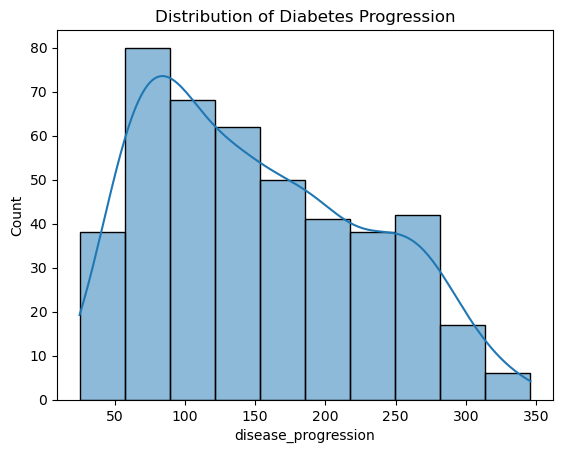

In [6]:
##Distribution of Target Variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(y, kde=True)
plt.title("Distribution of Diabetes Progression")
plt.show()


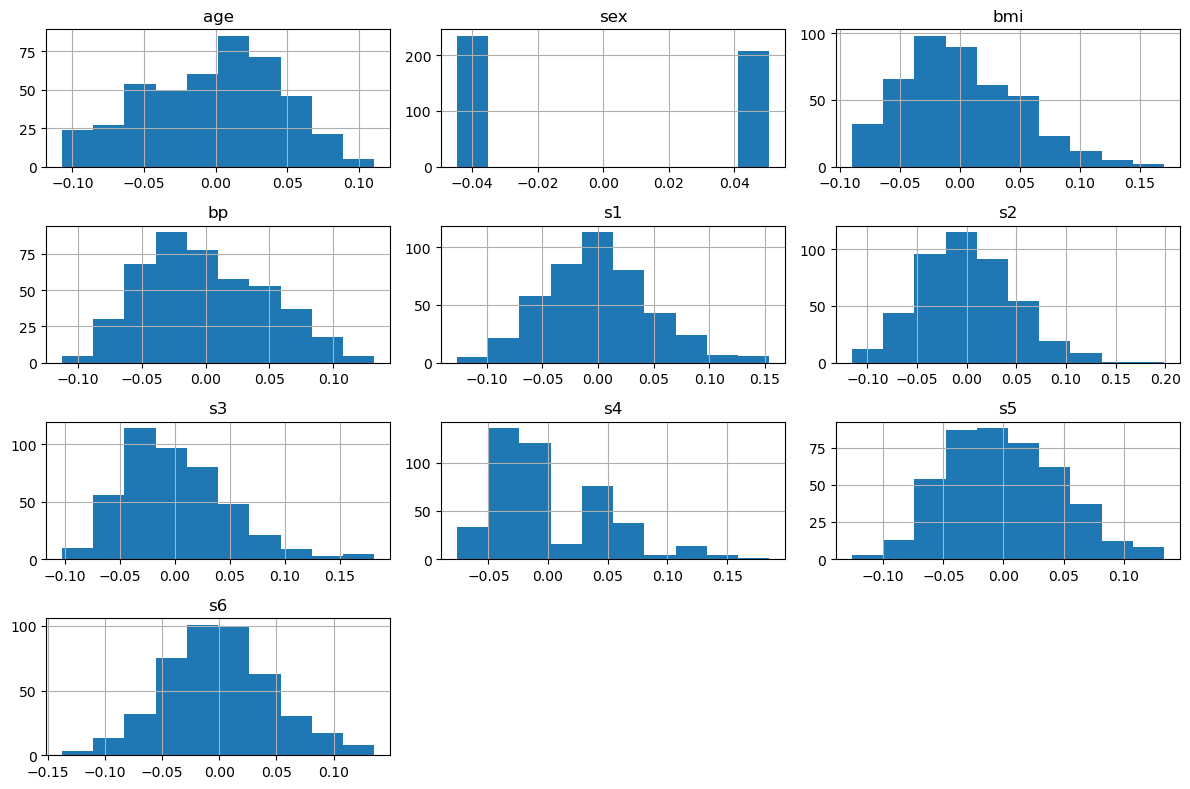

In [7]:
## Feature Distributions
X.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


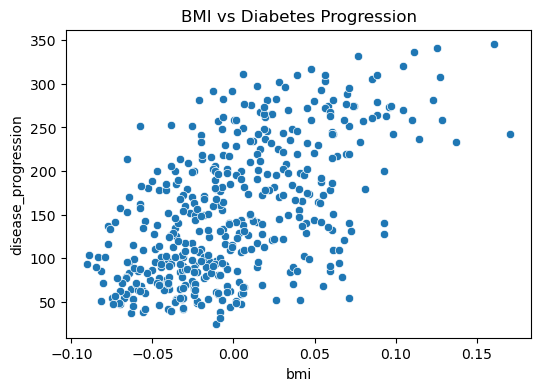

In [8]:
##Feature vs Target Relationship
plt.figure(figsize=(6,4))
sns.scatterplot(x=X['bmi'], y=y)
plt.title("BMI vs Diabetes Progression")
plt.show()


Target variable shows near-normal distribution

BMI, BP, and S5 show stronger correlation with diabetes progression

Relationships are non-linear → ANN is suitable

## 3. Building the ANN Model

In [9]:
##ANN Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(1)
])

model.summary()


c:\Users\arjun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4.Training the ANN Model

In [10]:
##Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
##Compile and Train
model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)


## 5. Evaluating the Model

In [12]:
##Model Performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


(5622.157588355605, -0.06115450353601526)

## 6. Improving the Model

In [13]:
##Model Enhancements
from tensorflow.keras.layers import Dropout

improved_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

improved_model.compile(
    optimizer='adam',
    loss='mse'
)

improved_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)


c:\Users\arjun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
##Re-evaluation
y_pred_improved = improved_model.predict(X_test)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

mse_improved, r2_improved


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


(2795.2881179250903, 0.4724031604591683)

ANN effectively captures non-linear relationships in diabetes progression

Feature normalization significantly improves performance

Model improvements (deeper network + dropout) lead to measurable gains

This approach can assist healthcare professionals in understanding disease dynamics